The accuracy score of K-Mean:  0.24
The confusion matrix of K-Mean:  [[ 0 50  0]
 [48  0  2]
 [14  0 36]]
The accuracy score of EM:  0.0
The confusion matrix of EM:  [[ 0 50  0]
 [ 5  0 45]
 [50  0  0]]


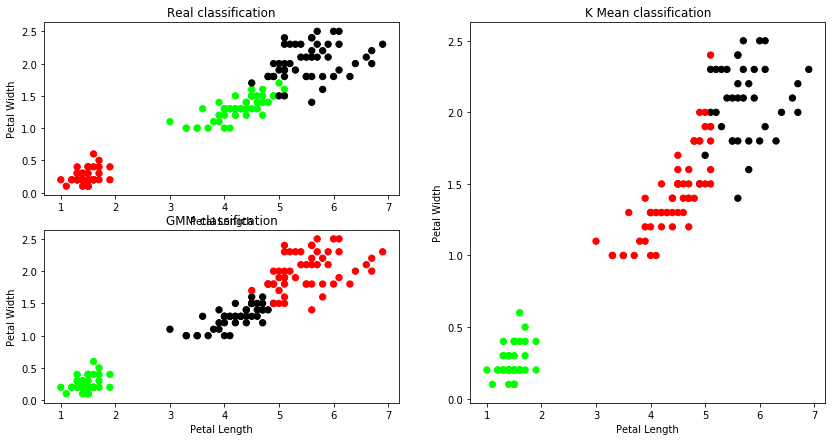

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd
import numpy as np
iris=datasets.load_iris()
x=pd.DataFrame(iris.data)
x.columns=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y=pd.DataFrame(iris.target)
y.columns=['Targets']
model=KMeans(n_clusters=3)
model.fit(x)
plt.figure(figsize=(14,7))
colormap=np.array(['red','lime','black'])
plt.subplot(2,2,1)
plt.scatter(x.Petal_Length,x.Petal_Width,c=colormap[y.Targets],s=40)
plt.title('Real classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.subplot(1,2,2)
plt.scatter(x.Petal_Length,x.Petal_Width,c=colormap[model.labels_],s=40)
plt.title('K Mean classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
print('The accuracy score of K-Mean: ',sm.accuracy_score(y,model.labels_))
print('The confusion matrix of K-Mean: ',sm.confusion_matrix(y,model.labels_))
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()
scaler.fit(x)
xsa=scaler.transform(x)
xs=pd.DataFrame(xsa,columns=x.columns)
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=3)
gmm.fit(xs)
y_gmm=gmm.predict(xs)
plt.subplot(2,2,3)
plt.scatter(x.Petal_Length,x.Petal_Width,c=colormap[y_gmm],s=40)
plt.title('GMM classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
print('The accuracy score of EM: ',sm.accuracy_score(y,y_gmm))
print('The confusion matrix of EM: ',sm.confusion_matrix(y,y_gmm))